<a href="https://colab.research.google.com/github/nayorans/PelatihanPPKDJakSel/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -P data/ https://raw.githubusercontent.com/nayorans/PelatihanPPKDJakSel/refs/heads/main/penjualan_toko.csv

--2025-10-31 02:24:07--  https://raw.githubusercontent.com/nayorans/PelatihanPPKDJakSel/refs/heads/main/penjualan_toko.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11235 (11K) [text/plain]
Saving to: ‘data/penjualan_toko.csv’

penjualan_toko.csv  100%[===================>]  10.97K  --.-KB/s    in 0.001s  

2025-10-31 02:24:08 (16.2 MB/s) - ‘data/penjualan_toko.csv’ saved [11235/11235]



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('data/penjualan_toko.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tanggal             200 non-null    object 
 1   Cabang              200 non-null    object 
 2   Produk              200 non-null    object 
 3   Jumlah_Terjual      200 non-null    float64
 4   Harga_Satuan        200 non-null    float64
 5   Metode_Pembayaran   200 non-null    object 
 6   Kepuasan_Pelanggan  200 non-null    float64
 7   Diskon              200 non-null    float64
 8   Pendapatan          200 non-null    float64
dtypes: float64(5), object(4)
memory usage: 14.3+ KB


In [20]:
df.head(15)

,Tanggal,Cabang,Produk,Jumlah_Terjual,Harga_Satuan,Metode_Pembayaran,Kepuasan_Pelanggan,Diskon,Pendapatan
0,1/1/2025,Medan,Laptop,1.0,7500000.0,Transfer,4.0,0.0,7500000.0
1,1/2/2025,Jakarta,Kulkas,1.0,9000000.0,Transfer,1.0,0.0,9000000.0
2,1/2/2025,Surabaya,Kulkas,4.0,3200000.0,Tunai,5.0,5.0,12160000.0
3,1/3/2025,Surabaya,AC,5.0,2500000.0,Transfer,2.0,20.0,10000000.0
4,1/4/2025,Medan,AC,1.0,4500000.0,Kartu Kredit,1.0,10.0,4050000.0
5,1/5/2025,Jakarta,AC,6.0,3200000.0,Transfer,1.0,10.0,17280000.0
6,1/5/2025,Bandung,TV,2.0,9000000.0,Kartu Kredit,5.0,5.0,17100000.0
7,1/8/2025,Jakarta,Kulkas,6.0,3200000.0,Tunai,3.0,20.0,15360000.0
8,1/9/2025,Medan,TV,9.0,2500000.0,Kartu Kredit,4.0,0.0,22500000.0
9,1/9/2025,Surabaya,Kulkas,3.0,6000000.0,Kartu Kredit,2.0,15.0,15300000.0


In [21]:
df.isnull().sum()

,0
Tanggal,1
Cabang,1
Produk,1
Jumlah_Terjual,1
Harga_Satuan,1
Metode_Pembayaran,1
Kepuasan_Pelanggan,1
Diskon,1
Pendapatan,1


In [22]:
print(df[df.isnull().any(axis=1)])

    Tanggal Cabang Produk  Jumlah_Terjual  Harga_Satuan Metode_Pembayaran  \
200     NaN    NaN    NaN             NaN           NaN               NaN   

     Kepuasan_Pelanggan  Diskon  Pendapatan  
200                 NaN     NaN         NaN  


In [23]:
df.tail(5)

,Tanggal,Cabang,Produk,Jumlah_Terjual,Harga_Satuan,Metode_Pembayaran,Kepuasan_Pelanggan,Diskon,Pendapatan
196,7/17/2025,Bandung,TV,3.0,2500000.0,Tunai,2.0,20.0,6000000.0
197,7/18/2025,Bandung,Laptop,4.0,4500000.0,Transfer,5.0,0.0,18000000.0
198,7/19/2025,Jakarta,AC,7.0,3200000.0,Kartu Kredit,2.0,15.0,19040000.0
199,7/19/2025,Surabaya,Kulkas,6.0,9000000.0,Transfer,5.0,15.0,45900000.0
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Tanggal,0
Cabang,0
Produk,0
Jumlah_Terjual,0
Harga_Satuan,0
Metode_Pembayaran,0
Kepuasan_Pelanggan,0
Diskon,0
Pendapatan,0


In [26]:
df.duplicated().sum()

np.int64(0)

In [36]:
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

In [37]:
numerical_cols

Index(['Jumlah_Terjual', 'Harga_Satuan', 'Kepuasan_Pelanggan', 'Diskon',
       'Pendapatan'],
      dtype='object')

In [38]:
categorical_cols

Index(['Tanggal', 'Cabang', 'Produk', 'Metode_Pembayaran'], dtype='object')

In [39]:
df.describe()

,Jumlah_Terjual,Harga_Satuan,Kepuasan_Pelanggan,Diskon,Pendapatan
count,200.000000,2.000000e+02,200.000000,200.000000,2.000000e+02
mean,4.790000,5.537000e+06,2.920000,9.850000,2.320065e+07
std,2.584433,2.370788e+06,1.426103,7.262314,1.685356e+07
min,1.000000,2.500000e+06,1.000000,0.000000,2.250000e+06
25%,3.000000,3.200000e+06,2.000000,5.000000,1.130625e+07
50%,5.000000,5.250000e+06,3.000000,10.000000,1.852000e+07
75%,7.000000,7.500000e+06,4.000000,15.000000,2.994375e+07
max,9.000000,9.000000e+06,5.000000,20.000000,8.100000e+07


In [30]:
df.describe(include='all')

,Tanggal,Cabang,Produk,Jumlah_Terjual,Harga_Satuan,Metode_Pembayaran,Kepuasan_Pelanggan,Diskon,Pendapatan
count,200,200,200,200.000000,2.000000e+02,200,200.000000,200.000000,2.000000e+02
unique,120,4,5,NaN,NaN,3,NaN,NaN,NaN
top,7/9/2025,Medan,Laptop,NaN,NaN,Tunai,NaN,NaN,NaN
freq,8,66,48,NaN,NaN,69,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.790000,5.537000e+06,NaN,2.920000,9.850000,2.320065e+07
std,NaN,NaN,NaN,2.584433,2.370788e+06,NaN,1.426103,7.262314,1.685356e+07
min,NaN,NaN,NaN,1.000000,2.500000e+06,NaN,1.000000,0.000000,2.250000e+06
25%,NaN,NaN,NaN,3.000000,3.200000e+06,NaN,2.000000,5.000000,1.130625e+07
50%,NaN,NaN,NaN,5.000000,5.250000e+06,NaN,3.000000,10.000000,1.852000e+07
75%,NaN,NaN,NaN,7.000000,7.500000e+06,NaN,4.000000,15.000000,2.994375e+07


In [29]:
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("-" * 30)

Value counts for Tanggal:
Tanggal
7/9/2025     8
1/15/2025    5
4/13/2025    4
1/28/2025    4
7/7/2025     4
            ..
7/8/2025     1
7/11/2025    1
7/12/2025    1
7/17/2025    1
7/18/2025    1
Name: count, Length: 120, dtype: int64
------------------------------
Value counts for Cabang:
Cabang
Medan       66
Jakarta     47
Surabaya    44
Bandung     43
Name: count, dtype: int64
------------------------------
Value counts for Produk:
Produk
Laptop    48
AC        45
Kulkas    40
TV        37
HP        30
Name: count, dtype: int64
------------------------------
Value counts for Metode_Pembayaran:
Metode_Pembayaran
Tunai           69
Transfer        67
Kartu Kredit    64
Name: count, dtype: int64
------------------------------


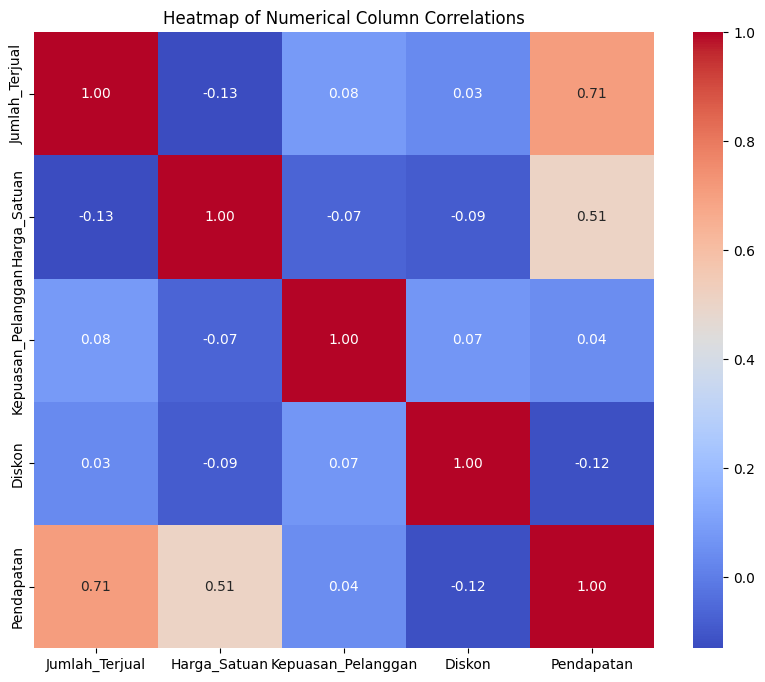

In [43]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Column Correlations')
plt.show()

In [53]:
sns.palettes.SEABORN_PALETTES

{'deep': ['#4C72B0',
  '#DD8452',
  '#55A868',
  '#C44E52',
  '#8172B3',
  '#937860',
  '#DA8BC3',
  '#8C8C8C',
  '#CCB974',
  '#64B5CD'],
 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'],
 'muted': ['#4878D0',
  '#EE854A',
  '#6ACC64',
  '#D65F5F',
  '#956CB4',
  '#8C613C',
  '#DC7EC0',
  '#797979',
  '#D5BB67',
  '#82C6E2'],
 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'],
 'pastel': ['#A1C9F4',
  '#FFB482',
  '#8DE5A1',
  '#FF9F9B',
  '#D0BBFF',
  '#DEBB9B',
  '#FAB0E4',
  '#CFCFCF',
  '#FFFEA3',
  '#B9F2F0'],
 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'],
 'bright': ['#023EFF',
  '#FF7C00',
  '#1AC938',
  '#E8000B',
  '#8B2BE2',
  '#9F4800',
  '#F14CC1',
  '#A3A3A3',
  '#FFC400',
  '#00D7FF'],
 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'],
 'dark': ['#001C7F',
  '#B1400D',
  '#12711C',
  '#8C0800',
  '#591E71',
  '#592F0D',
  '#A23582',
  '#3C3C3C',
  '#B8850A

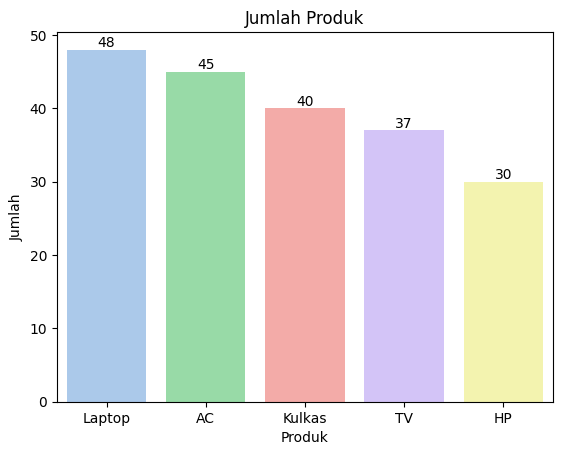

In [56]:
product_counts = df['Produk'].value_counts().reset_index()
product_counts.columns = ['Produk', 'Count']

ax = sns.barplot(x='Produk', y='Count', data=product_counts, hue='Produk', palette='pastel6', legend=False)
plt.title("Jumlah Produk")
plt.xlabel("Produk")
plt.ylabel("Jumlah")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

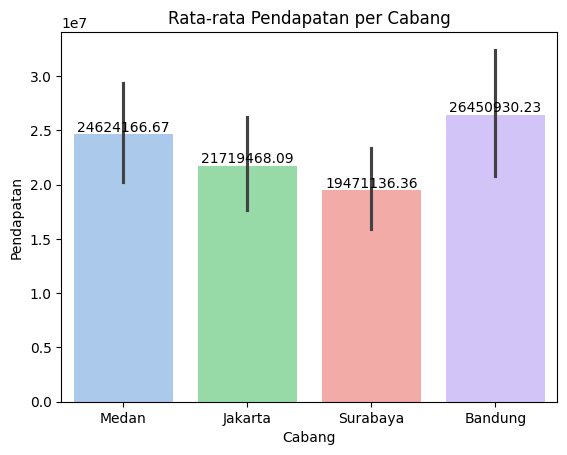

In [59]:
ax = sns.barplot(x='Cabang', y='Pendapatan', data=df, estimator='mean', hue='Cabang',
                 palette='pastel6', legend=False)
plt.title("Rata-rata Pendapatan per Cabang")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

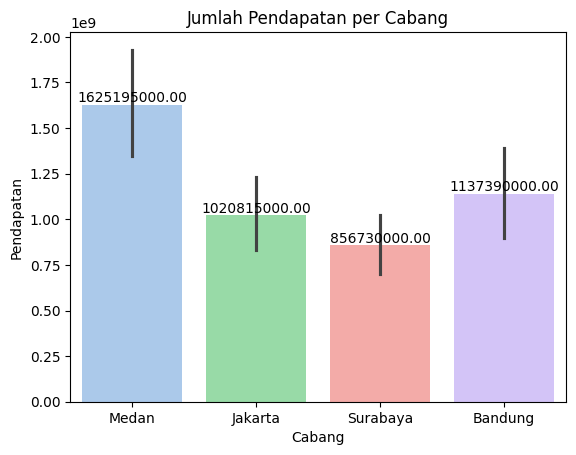

In [82]:
ax = sns.barplot(x='Cabang', y='Pendapatan', data=df, estimator='sum', hue='Cabang',
                 palette='pastel6', legend=False)
plt.title("Jumlah Pendapatan per Cabang")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

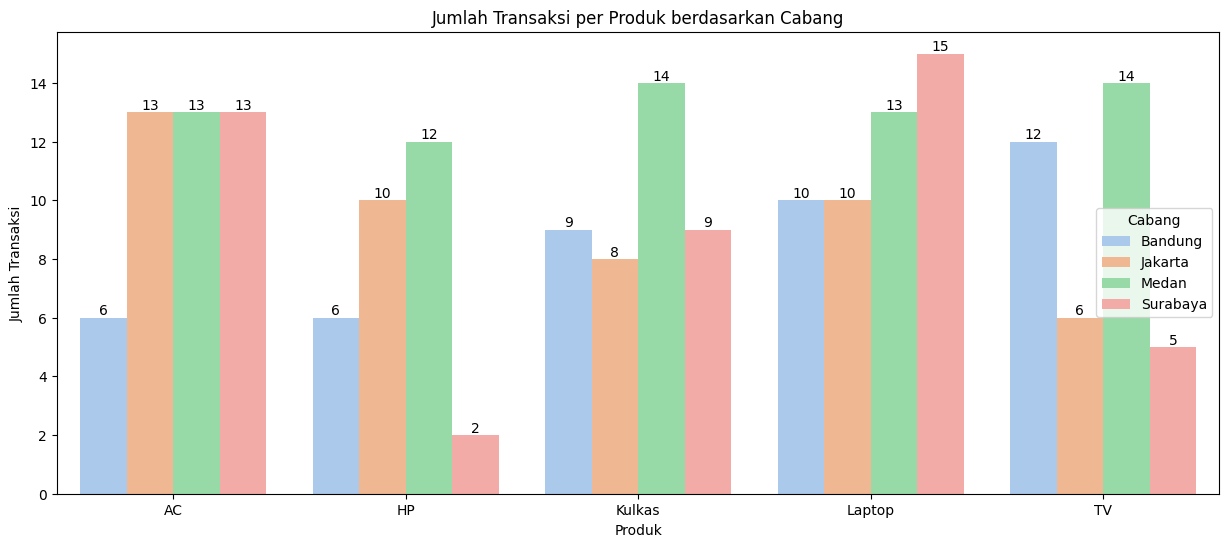

In [88]:
product_branch_counts = df.groupby(['Produk', 'Cabang']).size().reset_index(name='Count')

plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Produk', y='Count', hue='Cabang', data=product_branch_counts, palette='pastel')
plt.title('Jumlah Transaksi per Produk berdasarkan Cabang')
plt.xlabel('Produk')
plt.ylabel('Jumlah Transaksi')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

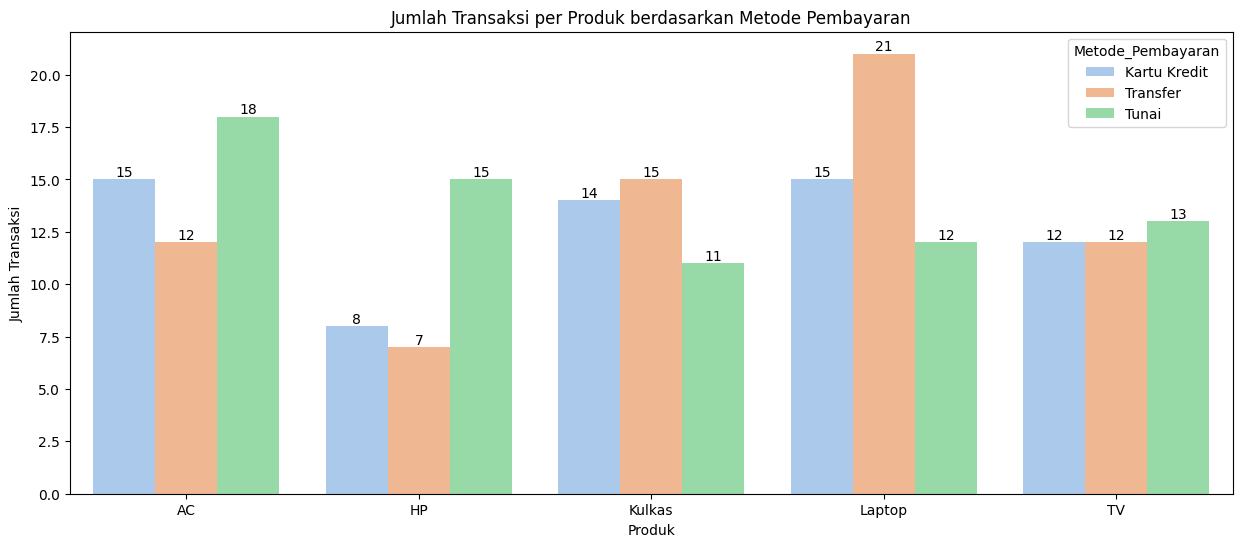

In [86]:
product_paymet_counts = df.groupby(['Produk', 'Metode_Pembayaran']).size().reset_index(name='Count')

plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Produk', y='Count', hue='Metode_Pembayaran', data=product_paymet_counts, palette='pastel')
plt.title('Jumlah Transaksi per Produk berdasarkan Metode Pembayaran')
plt.xlabel('Produk')
plt.ylabel('Jumlah Transaksi')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [89]:
max_discount_per_product = df.groupby('Produk')['Diskon'].max().reset_index()
print("Diskon maksimum untuk setiap produk:")
display(max_discount_per_product)

Diskon maksimum untuk setiap produk:


,Produk,Diskon
0,AC,20.0
1,HP,20.0
2,Kulkas,20.0
3,Laptop,20.0
4,TV,20.0


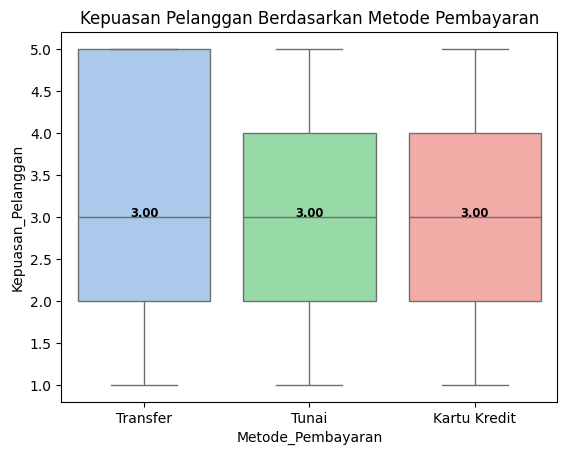

In [61]:
ax = sns.boxplot(x='Metode_Pembayaran', y='Kepuasan_Pelanggan', data=df, hue='Metode_Pembayaran',
                 palette='pastel6', legend=False)
plt.title("Kepuasan Pelanggan Berdasarkan Metode Pembayaran")

# Add labels to the medians
medians = df.groupby('Metode_Pembayaran')['Kepuasan_Pelanggan'].median().values
median_labels = [f'{m:.2f}' for m in medians]

for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick], median_labels[xtick],
            horizontalalignment='center', size='small', color='black', weight='semibold')

plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'Metode_Pembayaran'
label_encoder = LabelEncoder()
df['Metode_Pembayaran_Encoded'] = label_encoder.fit_transform(df['Metode_Pembayaran'])

# Calculate the correlation
correlation = df['Metode_Pembayaran_Encoded'].corr(df['Kepuasan_Pelanggan'])

print(f"Korelasi antara Metode_Pembayaran (Encoded) dan Kepuasan_Pelanggan: {correlation:.2f}")

Korelasi antara Metode_Pembayaran (Encoded) dan Kepuasan_Pelanggan: 0.00


In [67]:
numerical_cols = df.select_dtypes(include='number').columns

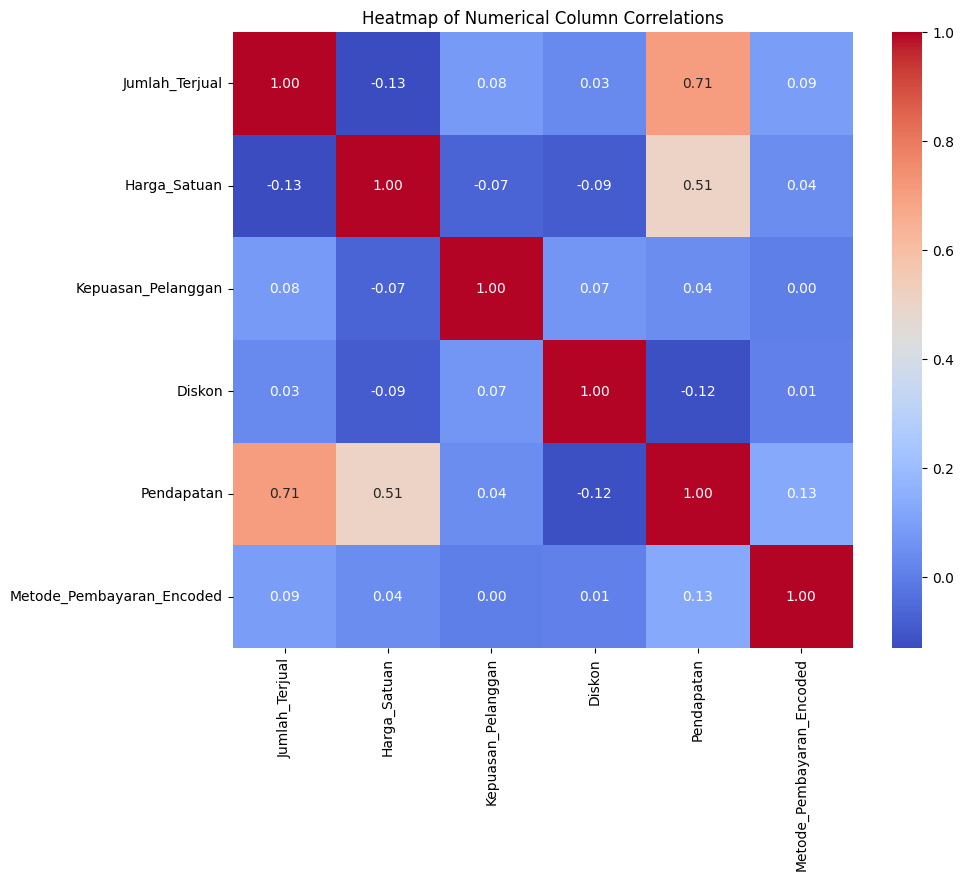

In [68]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Column Correlations')
plt.show()

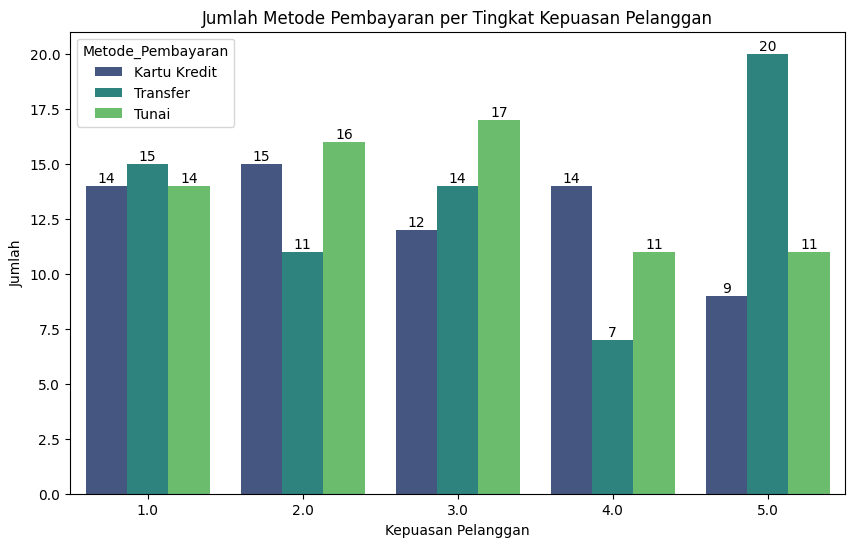

In [69]:
satisfaction_payment_counts = df.groupby('Kepuasan_Pelanggan')['Metode_Pembayaran'].value_counts().unstack(fill_value=0)
satisfaction_payment_counts = satisfaction_payment_counts.reset_index()

# Melt the dataframe to long format for easier plotting with seaborn
satisfaction_payment_melted = satisfaction_payment_counts.melt(id_vars='Kepuasan_Pelanggan', var_name='Metode_Pembayaran', value_name='Count')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Kepuasan_Pelanggan', y='Count', hue='Metode_Pembayaran', data=satisfaction_payment_melted, palette='viridis')
plt.title('Jumlah Metode Pembayaran per Tingkat Kepuasan Pelanggan')
plt.xlabel('Kepuasan Pelanggan')
plt.ylabel('Jumlah')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [62]:
import plotly.express as px

df['Tanggal'] = pd.to_datetime(df['Tanggal'])

fig = px.line(df, x='Tanggal', y='Pendapatan', title='Tren Pendapatan dari Waktu ke Waktu')
fig.show()

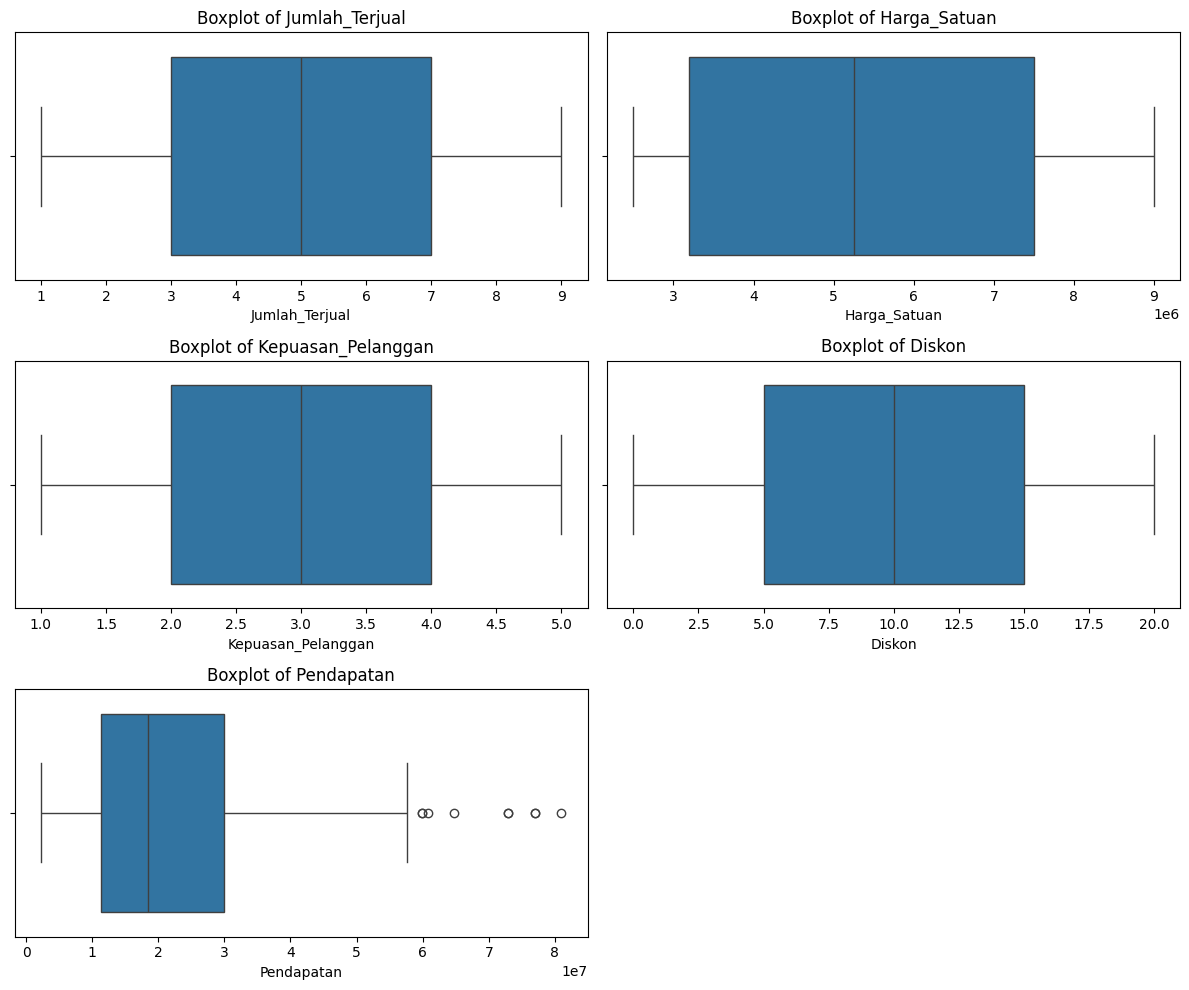

In [42]:
num_cols = len(numerical_cols)
n_rows = 3
n_cols = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [70]:
Q1 = df['Pendapatan'].quantile(0.25)
Q3 = df['Pendapatan'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Pendapatan'] < lower_bound) | (df['Pendapatan'] > upper_bound)]

print("Indeks outlier pada kolom 'Pendapatan':")
print(outliers.index.tolist())

Indeks outlier pada kolom 'Pendapatan':
[44, 55, 81, 91, 124, 129, 132, 166, 167]


In [75]:
# Display the rows corresponding to the outlier indices
print("Data outlier pada kolom 'Pendapatan':")
display(outliers)

Data outlier pada kolom 'Pendapatan':


,Tanggal,Cabang,Produk,Jumlah_Terjual,Harga_Satuan,Metode_Pembayaran,Kepuasan_Pelanggan,Diskon,Pendapatan,Metode_Pembayaran_Encoded
44,2025-02-13,Jakarta,AC,9.0,9000000.0,Transfer,3.0,10.0,72900000.0,1
55,2025-02-21,Bandung,Kulkas,7.0,9000000.0,Tunai,5.0,5.0,59850000.0,2
81,2025-03-22,Medan,Kulkas,7.0,9000000.0,Tunai,2.0,5.0,59850000.0,2
91,2025-03-30,Jakarta,Laptop,9.0,9000000.0,Tunai,5.0,10.0,72900000.0,2
124,2025-05-04,Bandung,Kulkas,9.0,9000000.0,Tunai,5.0,5.0,76950000.0,2
129,2025-05-10,Bandung,HP,9.0,9000000.0,Tunai,5.0,20.0,64800000.0,2
132,2025-05-11,Medan,TV,9.0,7500000.0,Tunai,4.0,10.0,60750000.0,2
166,2025-06-16,Medan,Kulkas,9.0,9000000.0,Kartu Kredit,2.0,5.0,76950000.0,0
167,2025-06-19,Medan,AC,9.0,9000000.0,Tunai,5.0,0.0,81000000.0,2
